# Open files ( scores & lat and lon)

In [2]:
    from osgeo import gdal
    import numpy as np
    from mpl_toolkits.basemap import Basemap
    from scipy.interpolate import griddata
    import matplotlib.pyplot as plt
        
    src_lat='/Users/reem/Documents/DeepLearning/code/showResultOnMap/lat_2.npy'
    lat_arr = np.array(np.load(src_lat))
    lat_arr = np.flipud(lat_arr)
    lat_arr_slice=lat_arr[400:1543 ,0:5313]#[400:1543 ,3000:4000]


    
    src_lon='/Users/reem/Documents/DeepLearning/code/showResultOnMap/lon_2.npy'
    lon_arr = np.array(np.load(src_lon))
    lon_arr = np.flipud(lon_arr)
    lon_arr_slice=lon_arr[400:1543 ,0:5313]#[400:1543 ,3000:4000]

    print(lon_arr_slice.shape)

    

(1143, 5313)


# Deep learning Result

In [3]:
    src_z='/Users/reem/Documents/DeepLearning/code/showResultOnMap/scores.npy'
    z_score_arr = np.array(np.load(src_z))
    z_score_arr = np.flipud(z_score_arr)

    score_slice=z_score_arr[400:1543 ,:]

# CCD Result 

In [4]:
filepath67 = r"/Users/reem/projAlaith/merged/interferograms/20181108_20181120/filt_fine.cor"
filepath68 = r"/Users/reem/projAlaith/merged/interferograms/20181120_20181202/filt_fine.cor"

ds67 = np.array(gdal.Open(filepath67).ReadAsArray())
ds68 = np.array(gdal.Open(filepath68).ReadAsArray())

CCD=np.subtract(ds67,ds68)
#np.save('subtract_coh1108-1120-1202.npy', coh1)
CCD = np.flipud(CCD)

CCD_slice=CCD[400:1543 ,0:5313]

# Show in crypto

In [5]:
import sys
import os
import subprocess
import datetime
import platform

import pandas as pd
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
from cartopy.io.img_tiles import OSM
import cartopy.feature as cfeature
from cartopy.io import shapereader
from cartopy.io.img_tiles import StamenTerrain
from cartopy.io.img_tiles import GoogleTiles
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature

#from owslib.wmts import WebMapTileService
from matplotlib.path import Path
import matplotlib.patheffects as PathEffects
import matplotlib.patches as mpatches

import numpy as np

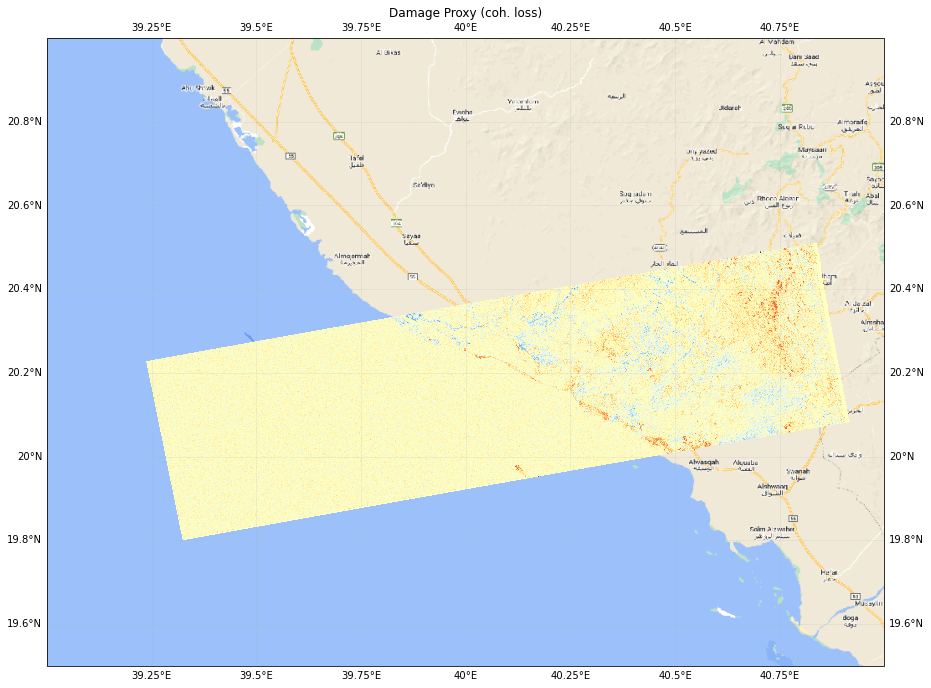

In [9]:
    fig = plt.figure(figsize=(15,20))
    # define a map projection
    #tifproj = ccrs.epsg(27700)
    tiler = GoogleTiles()
    mercator = tiler.crs
    ax = plt.axes(projection=ccrs.PlateCarree())

    ax.set_extent(( 39, 41, 21, 19.5))

    zoom = 10
    ax.gridlines(draw_labels=True, alpha=0.2)
    # even 1:10m are too coarse for .2 degree square
    #ax.coastlines('10m')

    #home_lat, home_lon = -26.5258277,153.0912987
    # Add a marker for home
   # plt.plot(home_lon, home_lat, marker='o', color='red', markersize=5,
    #         alpha=0.7, transform=ccrs.Geodetic())
    plt.pcolormesh(lon_arr_slice,lat_arr_slice,CCD_slice,vmin=-1, vmax=1, cmap="RdYlBu") #vmin=-5, vmax=1
    ax.add_image(tiler, zoom )
   # ax.colorbar()  
    plt.title("Damage Proxy (coh. loss)") 
    #, transform='epsg:4326'
    plt.show()

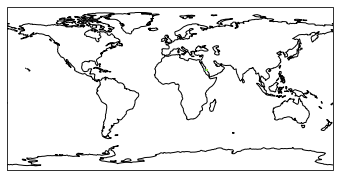

In [17]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt


# The projection keyword determines how the plot will look
plt.figure(figsize=(6, 3))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines()

ax.contourf(lon_arr_slice,lat_arr_slice, CCD_slice)  # didn't use transform, but looks ok...
plt.show()


In [1]:
    fig = plt.figure(figsize=(20,25))
    # define a map projection
    #tifproj = ccrs.epsg(27700)
    tiler = GoogleTiles(style='satellite')
    mercator = tiler.crs
    ax = plt.axes(projection=ccrs.PlateCarree())

    ax.set_extent(( 39, 41, 21, 19))

    zoom = 15

    # even 1:10m are too coarse for .2 degree square
    #ax.coastlines('10m')

    #home_lat, home_lon = -26.5258277,153.0912987
    # Add a marker for home
   # plt.plot(home_lon, home_lat, marker='o', color='red', markersize=5,
    #         alpha=0.7, transform=ccrs.Geodetic())
    plt.pcolormesh(lon_arr_slice,lat_arr_slice,CCD_slice,vmin=-1, vmax=1, cmap="RdYlBu") #vmin=-5, vmax=1
    ax.add_image(tiler, zoom )
   # ax.colorbar()  
    plt.title("Matplotlib pcolormesh") 
    #, transform='epsg:4326'
    plt.show()



NameError: name 'plt' is not defined

In [11]:
    import pandas as pd
    import matplotlib.pyplot as plt

    import cartopy.crs as ccrs
    from cartopy.io.img_tiles import OSM
    import cartopy.feature as cfeature
    from cartopy.io import shapereader
    from cartopy.io.img_tiles import StamenTerrain
    from cartopy.io.img_tiles import GoogleTiles
    from owslib.wmts import WebMapTileService

    from matplotlib.path import Path
    import matplotlib.patheffects as PathEffects
    import matplotlib.patches as mpatches

    import numpy as np
    # URL of NASA GIBS
    URL = 'http://gibs.earthdata.nasa.gov/wmts/epsg4326/best/wmts.cgi'
    wmts = WebMapTileService(URL)

    # Layers for MODIS true color and snow RGB
    layers = ['MODIS_Terra_SurfaceReflectance_Bands143',
              'MODIS_Terra_CorrectedReflectance_Bands367']

    date_str = '2017-02-12'

ModuleNotFoundError: No module named 'owslib'